# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn import tree
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
# import google drive and mount drive
from google.colab import drive
drive.mount('/content/drive/')

df_Load = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# copying data to another variable to avoid any changes to original data
df = df_Load.copy()

## Data Overview

In [4]:
# Study the shape,info and statistical info of the data ( coded below across a few blocks)
print('Shape:', df.shape)

Shape: (5000, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [6]:
print('\nStatistical details:\n',df.describe().T.to_string())


Statistical details:
                       count      mean      std       min       25%       50%       75%       max
ID                 5000.000  2500.500 1443.520     1.000  1250.750  2500.500  3750.250  5000.000
Age                5000.000    45.338   11.463    23.000    35.000    45.000    55.000    67.000
Experience         5000.000    20.105   11.468    -3.000    10.000    20.000    30.000    43.000
Income             5000.000    73.774   46.034     8.000    39.000    64.000    98.000   224.000
ZIPCode            5000.000 93169.257 1759.455 90005.000 91911.000 93437.000 94608.000 96651.000
Family             5000.000     2.396    1.148     1.000     1.000     2.000     3.000     4.000
CCAvg              5000.000     1.938    1.748     0.000     0.700     1.500     2.500    10.000
Education          5000.000     1.881    0.840     1.000     1.000     2.000     3.000     3.000
Mortgage           5000.000    56.499  101.714     0.000     0.000     0.000   101.000   635.000
Persona

In [7]:
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.400,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.500,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.300,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.600,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.900,3,0,1,0,0,0,0


In [8]:
df.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.670,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800,1,0,0,0,0,1,1


In [9]:
# checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

In [11]:
# checking for duplicate values specifically of the customer "ID" column to ensure there are no duplicates
df['ID'].nunique()

5000

Observations: we observer that:
- The dataset has 5000 rows and 14 columns
- All the 14 columns are numerical values. All are int64 datatypes with one exception which is the 'CCAvg' column which is a float64.
- 'Zipcode' as a numerical column may be an issue for the analysis hence we will convert it into a categorical variable in the preprocessing section.
- We also see that the following columns contain only 0's and 1's and therefore there is no need to perform get_dummies() in the preprocessing section for them- 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'
- We see that the 'Experience' column has negative number(s) as reflected in the minimum value in the statistical details. We will rectify this in the preprocessing section
- We see that the 'Eduction' column has numerical values (ie 1,2,3) instead of actual categorical values (ie undergrad etc. We will replace these and then perform a one-hot encoding, in the preprocessing section.
 - 'Personal loan', ofcourse is our 'target' variable

Sanity checks:
- We see that there are no null or missing values. Therefore there is no need for null value preprocessing.
- Also there are no duplicate values. The customer 'ID' column also contains all unique values therefore there are no duplicates row of the same customer either.

## Data Preprocessing

In [12]:
# Replace the values in 'education' column in the dataframe 'df' from '1','2','3' to 'Undergrad','Graduate','Advanced/Professional' respectively

df['Education'] = df['Education'].map({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})


In [13]:
# Check how many of experience data values are inconsistent
# checking if experience <0
df[df["Experience"] < 0]["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [14]:
# Correcting the experience values. We'll assume that the data entry of these negative values has been incorrectly done and therefore we will just correct the polarity.
#This correction should ideally be cross verified with the bank stakeholders in reality
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [15]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")    # Complete the code to convert the cat_cols to category

## Exploratory Data Analysis.

We will perform univariate analysis on all the variables and provide observations on their distributions. (histograms, boxplots, countplot etc).

We will also do bi-variate analysis to explore relationships between the important variables in the dataset (ie explore relations between numerical variables as well as relations between numerical and categorical variables;inclduing ofcourse the relationships of all the 'x' variables with the target (personal loan) 'y' variable)

In [16]:
# The below code is a function that we will use subsequently to create histograms and boxplots together
def histogram_boxplot(data, feature, figsize=(7, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
#The below code is a function to create labeled barplots. We will use this function also in analysis that is to follow.

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    # Get the current figure and change its width to 15 inches and its height to 2 inches
    fig = plt.gcf()
    fig.set_figwidth(3)
    fig.set_figheight(5)

    plt.tight_layout()

    plt.show()  # show the plot

In [18]:
#The below code is a function to plot Cumulative distribution fuction of numerical variables. We may use this function also in analysis if needed.
def CDF_view(data):
  """
    data: dataframe
  """
  no_of_cols = data.shape[1]

  fig, axes = plt.subplots(round(no_of_cols/2), 2, figsize=(20, 20))
  fig.suptitle("CDF plot of numerical variables", fontsize=15)

  counter = 0

  for i in range(round(no_of_cols/2)):
      sns.ecdfplot(data=df, ax=axes[i][0], x=df.columns.tolist()[counter])
      counter = counter + 1
      if counter != no_of_cols:
          sns.ecdfplot(data=df, ax=axes[i][1], x=df.columns.tolist()[counter])
          counter = counter + 1
      else:
          pass

  fig.tight_layout(pad=2.0)

###UNIVARIATE ANALYSIS:

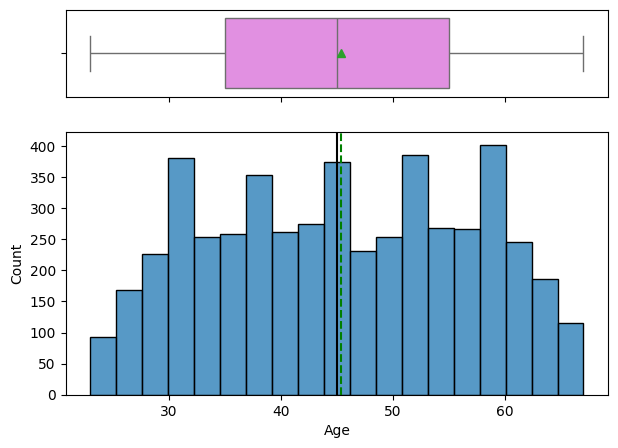

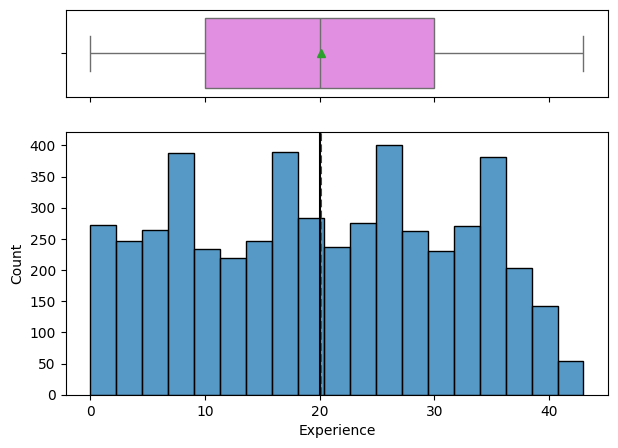

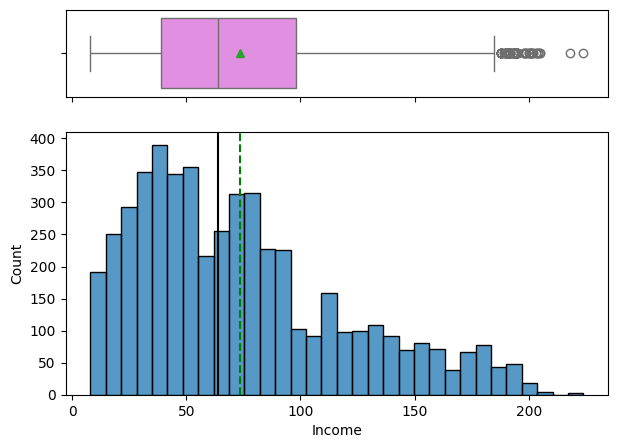

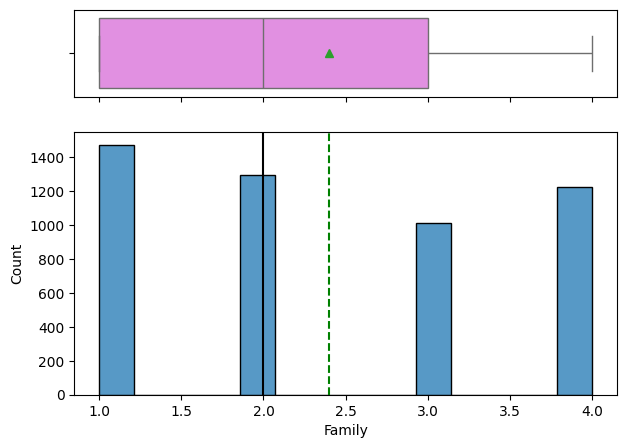

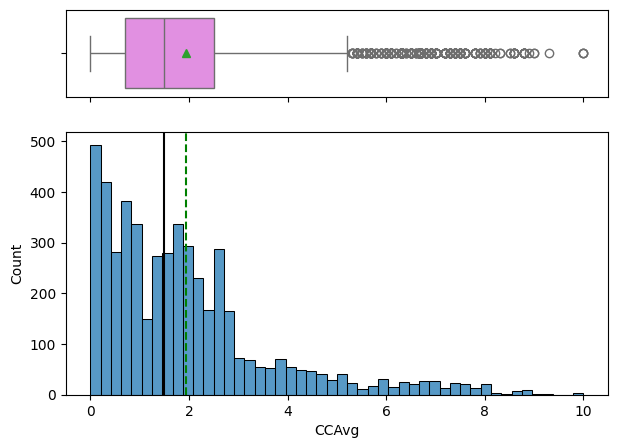

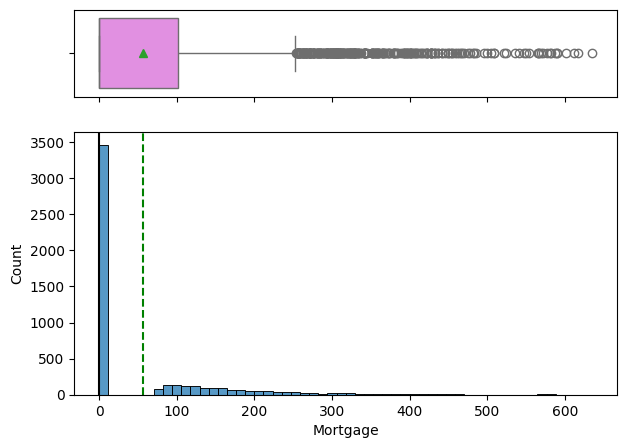

In [19]:
# Firstly study the boxplots and histograms of all the numerical variables.
#Drop the non numerical columns & non essential columns in the df to filter for only key variables ie drop the columns 'ID','ZIPCode',
                                                   #'Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard'

df_selectcols = df.copy()
df_selectcols = df_selectcols.drop(columns = ['ID','ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard'],axis = 1)
for i in df_selectcols.columns.to_list():
  histogram_boxplot(df_selectcols,i)

In [20]:
# Find the percentage of customers who have mortgage. Also find % of customers who have a NON-ZERO CCAvg. Also find % of customers below 35 yrs age
print(df[df['Mortgage']>0].shape[0]*100/df.shape[0],'% of customers have mortgage')
print(df[df['CCAvg']>0].shape[0]*100/df.shape[0],'% of customers have credit card avg. spend greater than Zero')
print(df[df['Age']<40].shape[0]*100/df.shape[0],'% of customers are below 40 yrs age')


30.76 % of customers have mortgage
97.88 % of customers have credit card avg. spend greater than Zero
34.7 % of customers are below 40 yrs age


Observations:
- Age: ~35% of customers are less than 40 yrs age. Also mean and median of age parameter are very close at ~45 yrs. 50% of the age rage is between 35-55 yrs
- Experience: Mean and median are very close at ~20 yrs. 50% of the age rage is between 10-30 yrs experience.
- Income: Mean: 73.78k ; Median: 64k. Income is right skewed pushing the mean to the right; outliers exist beyond the 175k dollars mark.
- Family: Right skewed with outliers containing more than 2 members. Median family size is 2 members.
- CCAvg: Right skewed with outliers at greater than 5K dollars spending per month. Mean: 1.94k ; Median: 1.5k dollars. 97.9% of customers have a non-zero CCAvg spend.
- Mortgage: Right skewed with outliers at greater than 250K dollars spending per month. Mean of 56.5k dollars  but Median of 0.0 dollars since only 30.76% customer have mortgage.

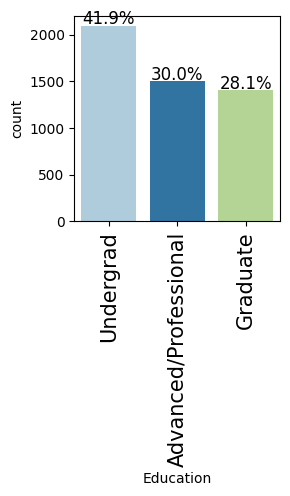

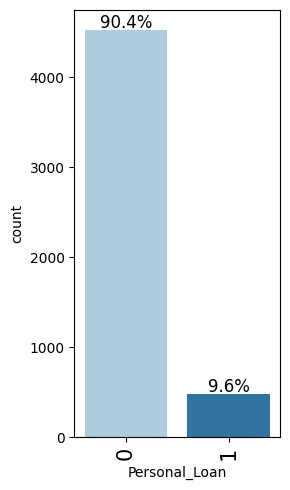

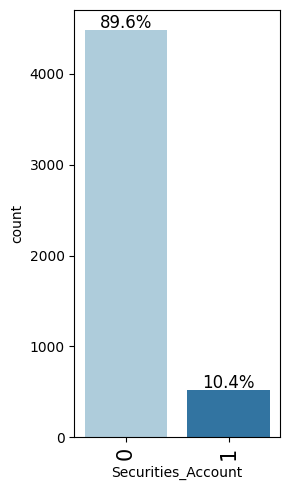

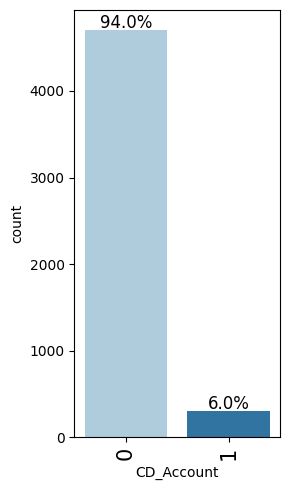

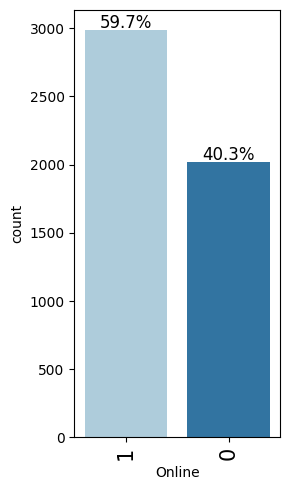

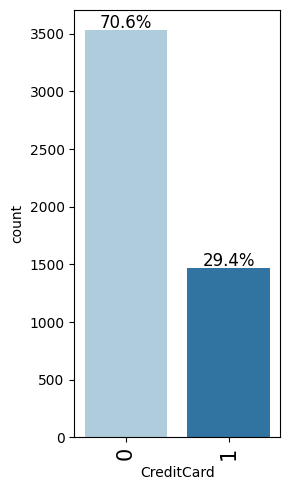

In [21]:
#Create barplots for all categorical variables except for ZIP code
# We will analyse ZIP code and its relationship with the target variable  in the bivariate analysis
df_with_cat_cols = df[['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']].copy()
for i in df_with_cat_cols.columns.to_list():
  labeled_barplot(df_with_cat_cols,i,perc=True)

Observations:
- Education: Close to 42% of customers are Undergrad. About 30% each, are Grads and Advanced/Professional
- Personal Loan: 9.6% of customers have availed personal loan ( as was already given in the business case)
- Securities Account: Close to 90% of customers do not have securities account
- CD Account: 94% customers do not have CD account
- Online: ~60% customers do not use online banking facilities
- Credit card: ~70% do not have a credit card issued by any other bank

###BIVARIATE ANALYSIS:

In [22]:
### The below code is a function to plot stacked barplot with target variable. We will use this in the bivariate analysis that will follow further down.

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True, normalize='index')#.sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    fig = plt.gcf()
    fig.set_figwidth(1.5)
    fig.set_figheight(3)

    plt.show()

In [23]:
### The below code is a function to plot distributions wrt target ( ie 'personal loan') variable. We will use this in the bivariate analysis that will follow further down.
#@

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of "+target+" for "+target+" = "+str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of "+target+" for "+target+" = "+str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t "+target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Personal_Loan             0     1
Education                        
Advanced/Professional 0.863 0.137
Graduate              0.870 0.130
Undergrad             0.956 0.044
All                   0.904 0.096
------------------------------------------------------------------------------------------------------------------------


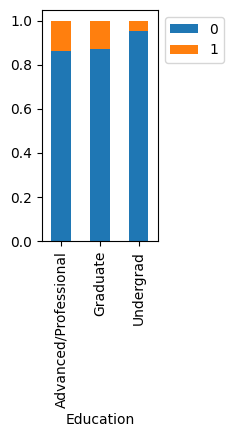

Personal_Loan          0     1
Securities_Account            
0                  0.906 0.094
1                  0.885 0.115
All                0.904 0.096
------------------------------------------------------------------------------------------------------------------------


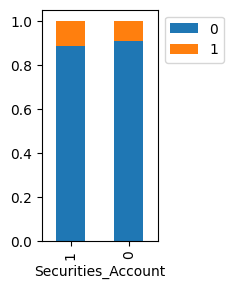

Personal_Loan     0     1
CD_Account               
0             0.928 0.072
1             0.536 0.464
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


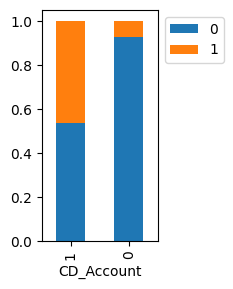

Personal_Loan     0     1
Online                   
0             0.906 0.094
1             0.902 0.098
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


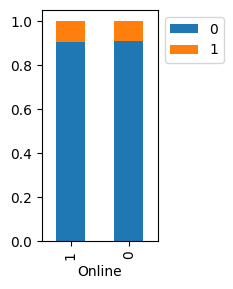

Personal_Loan     0     1
CreditCard               
0             0.905 0.095
1             0.903 0.097
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


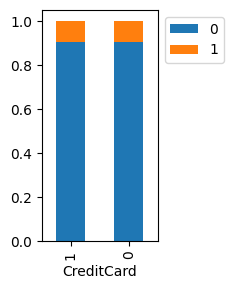

In [24]:
#First, Study the relationship between the target varaible (ie Personal Loan) and the other categorial variables

df_for_study = df[['Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']].copy()

for i in df_for_study.columns.to_list():
  if(i != 'Personal_Loan'):
    stacked_barplot(df_for_study, i, 'Personal_Loan')



Observations:
- We see that ~13.7% of customers in Advanced/professional category have availed personal loan. Also ~13% of Grads have availed loans as opposed to only 4% of undergrads who have availed loans
- 46% of customers who have CD account have availed personal loan as opposed to only 7% of customer who do not have a CD account have availed loan
- Customers using online facilities seem to have no bearing with availing personal loan. In both cases (online- yes and no) only 9%customer have availed loan
- Customers having securities accounts seem to have no major bearing with availing personal loan. In both cases only 9% to 11% customer have availed loan
- Also Customers with or without credit cards from other banks seem to have no bearing with availing personal loan. In both cases only approx 9.6% customer have availed loan


In [25]:
# study if the target (ie Personal_Loan column) has any relationship with the ZIPCode
df['ZIPCode'].value_counts(normalize=True).sort_values(ascending=False)
pd.crosstab(index = df['ZIPCode'],columns=df['Personal_Loan'],margins=True,normalize=True).sort_values('All',ascending=False)


Personal_Loan,0,1,All
ZIPCode,,,
All,0.904,0.096,1.000
94720,0.030,0.004,0.034
94305,0.023,0.003,0.025
95616,0.022,0.001,0.023
90095,0.013,0.002,0.014
...,...,...,...
94598,0.000,0.000,0.000
90813,0.000,0.000,0.000
94970,0.000,0.000,0.000


Observations wrt ZIPCode:
- We observe that first of all, customers are largely dispersed across the 467 zip codes. The largest concentration of customers in a single zip code is just ~3.4% of the total customer base for the bank. Moreover, within this zip code, only about 0.4% of the customers have availed loan.  
- Based on this observation we conclude that ZIPCode has no bearing on a customer availing or not availing a personal loan.

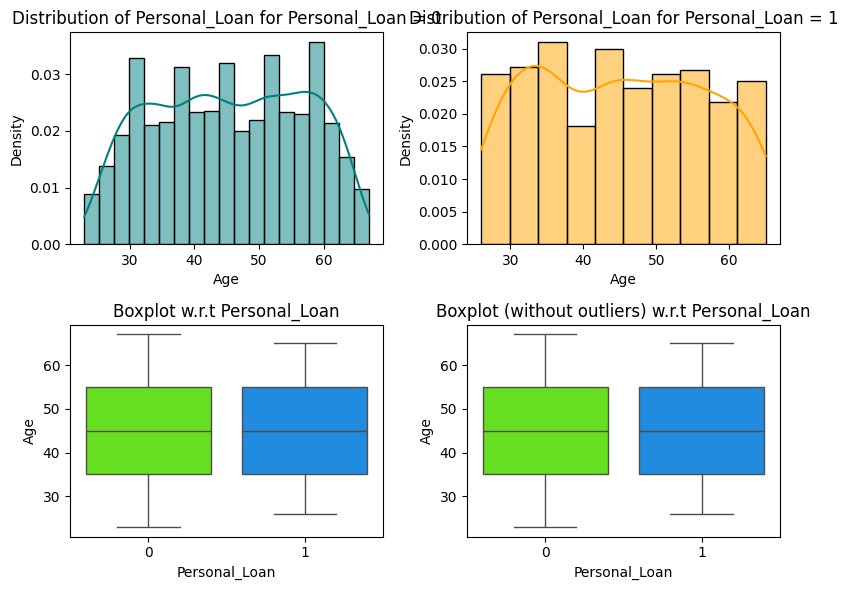

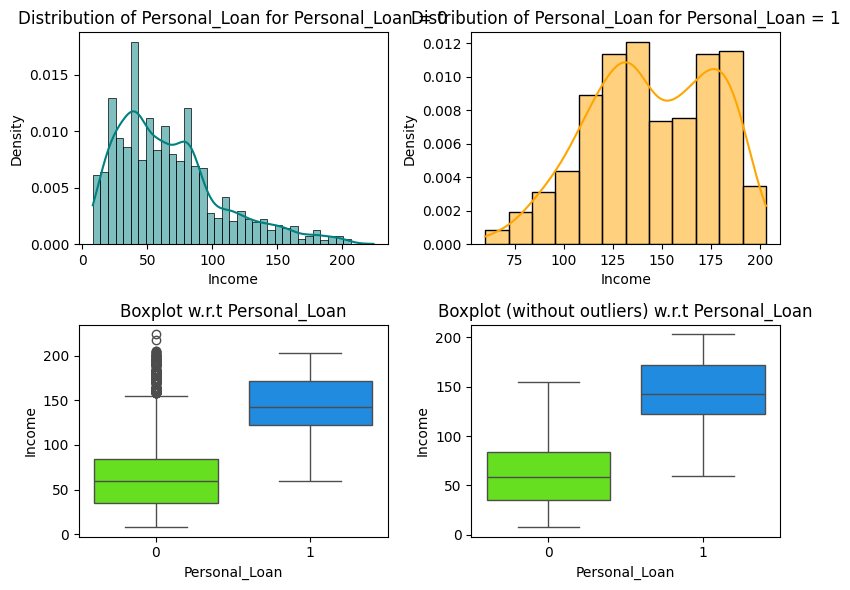

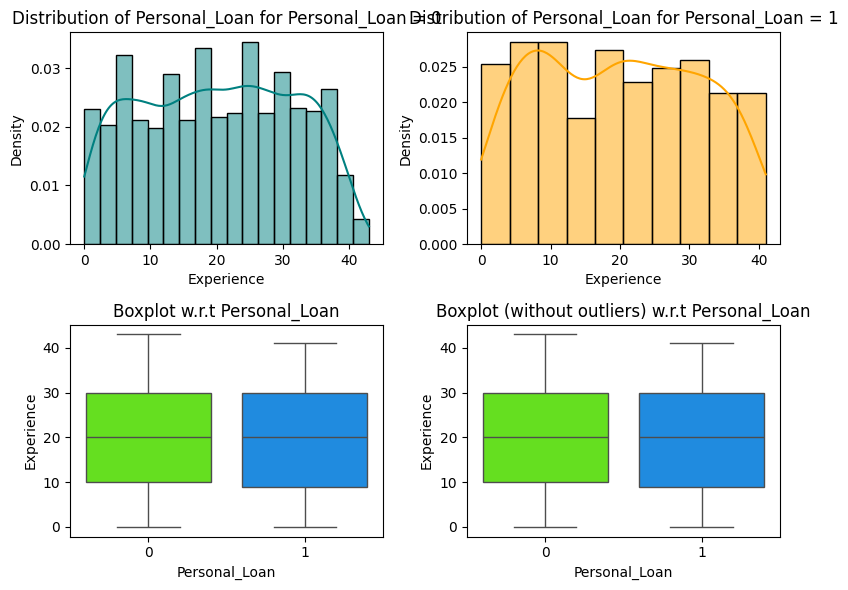

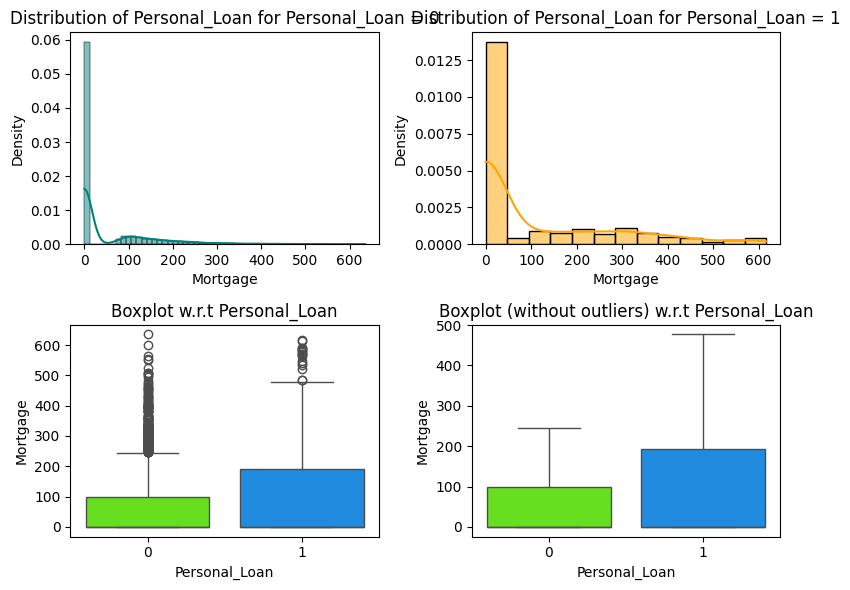

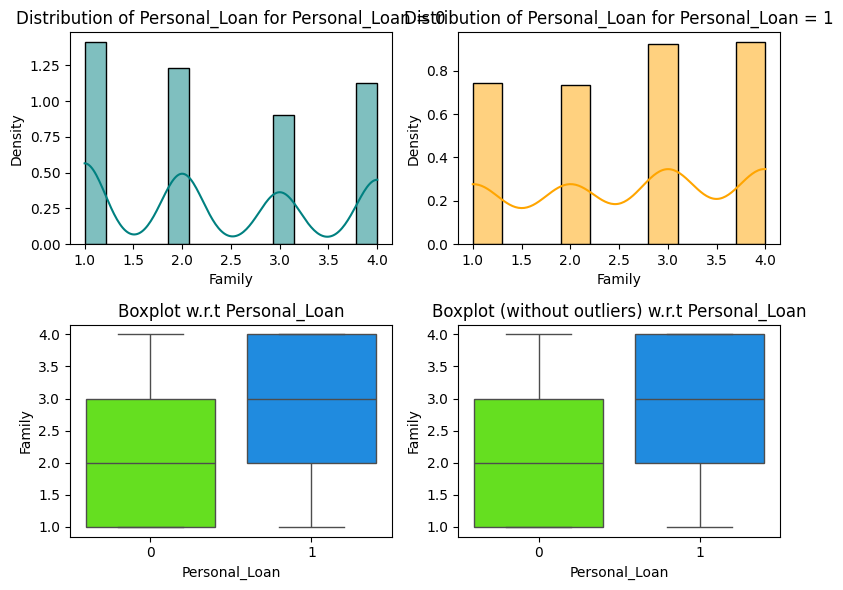

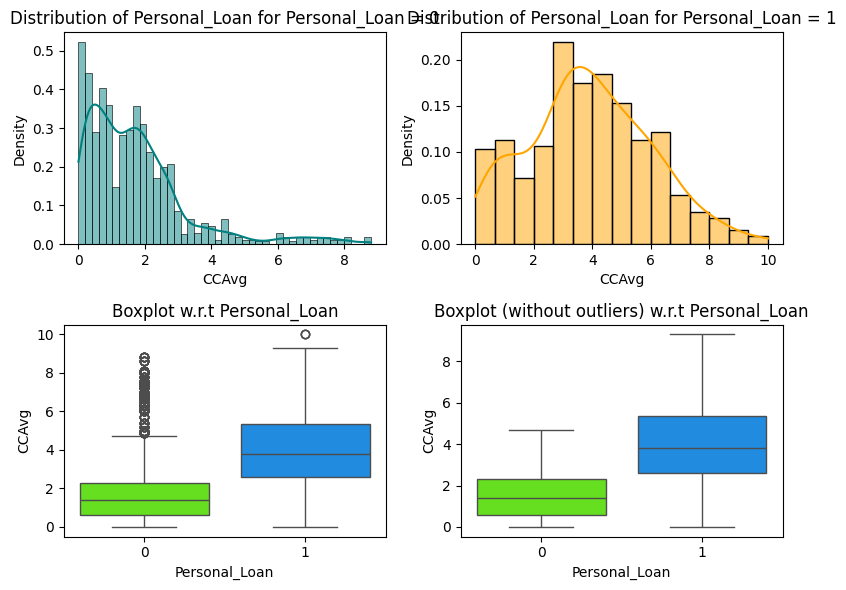


 % customers who have a non zero mortgage and have taken personal loans: 10.92 %


In [26]:
# study the relationship between target variable (ie Personal_Loan, a categorical variable) and the numerical variables
df_selectcols = df[['Personal_Loan','Age','Income','Experience','Mortgage','Family','CCAvg']].copy()
for i in df_selectcols.columns.to_list():
  if(i != 'Personal_Loan'):
    distribution_plot_wrt_target(df_selectcols, i, 'Personal_Loan')

#Wrt mortgage, calacuate what % of customers who have the mortgage, have taken personal loan
perc_mort_andpersonal_loan = df_selectcols[df_selectcols['Mortgage'] != 0][df_selectcols['Personal_Loan'] != 0].shape[0]/df_selectcols[df_selectcols['Mortgage'] != 0].shape[0]
print('\n % customers who have a non zero mortgage and have taken personal loans:',round(perc_mort_andpersonal_loan*100,2),'%')

Observations:
- Age: On review of Age graph above, it seem it does not have any bearing on a customer taking/not taking a personal loan from the bank
- Income: The graphs of Income above indicate that customers who have taken personal loan have higher incomes with their median at 150k as opposed to median income of customers not taking personal loan was at about 60k
- Experience: The experience graphs above indicate that it does not have any bearing on a customer taking or not taking a personal loan from the bank.
- Mortgage: The IQR of mortgage is almost twice in cases where customer have taken personal loans as opposed to where they have not indicating that if size of mortgage is higher, there is likelyhood of customer taking personal loan. However given we know that only 30% of customers have even taken mortgage and of those only 10% have taken personal loan and more over, the median mortgage is zero dollars, it is quite likely that having a mortgage or not having mortgage has no bearing on taking personal loan.
- Family: Based on graph above, Families of larger sizes (ie >2 members) are likely to take personal loans as opposed to families of size 2
- CCAvg: Customers with higher CCAvg spend (median of ~3.5k per month) are more likely to taken personal loan as opposed to those with lower CCAvg (median of ~1.5k per month).

We will further cross-validate relationship of all these variables against the target variable when we run their correlations against each other.

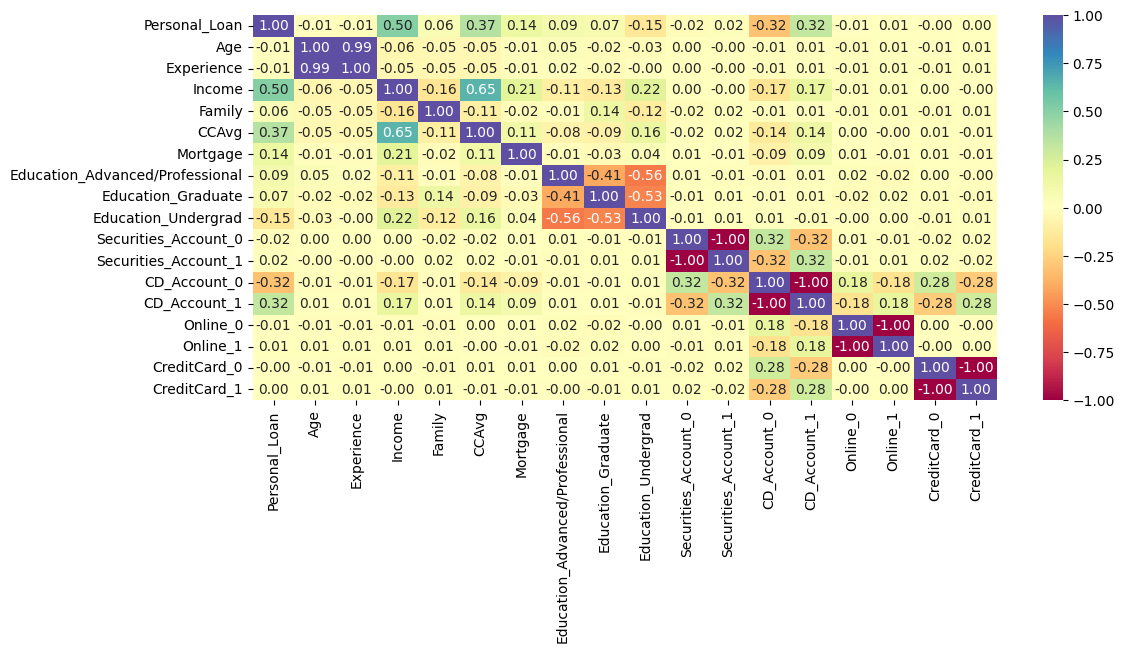

In [27]:
#create a headmap to study/cross-validate relationships-
#quickly select columns of interest aswell as pre-process the education column using one-hot encoding first
df_select_cols_for_heatmap = df[['Personal_Loan','Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']].copy()
df_select_cols_for_heatmap = pd.get_dummies(df_select_cols_for_heatmap) # dont drop any column of education because we want to evaluate all the edu columns for their corr with personal loans

plt.figure(figsize=(12, 5))
sns.heatmap(df_select_cols_for_heatmap.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

As we observe above, the correlation matrix validates some of the earlier noted findings, namely:
- Age, Experience,Securities account(y/n), online access (y/n), CreditCard(y/n) either have no or very minimal bearing on customers' propensity to take personal loans.

On the other hand,

- Customers with higher income, bigger familes, higher mortgage values and customer with higher CCAvg spend have a higher propensity to taking personal loans.

- Wrt Education,  
   a)Undergrads are not likely to take personal loan ( since it is negatively correlated) where as,
   b) Graduates are slightly inclined (but not strongly inclined) to take personal loan.
   c) Advanced/Professional are mostly likely to take personal loans within the education category, when compared across all the three.

   We will further cross-validate the importance of all these variables against the target variable when we run their 'feature importance' analysis against the target in our modelling section.

### Preparing data for modelling

- Given it is a classification based prediction problem, we will be employing the decision tree model to solve it.  
- Given we have decided to build a decision tree model we will not be scaling the features. As we know, Decision trees are impervious to scale differences between the features/parameters.
- Wrt Feature engineering:
  - We will fliter-out ie remove the following columns from our dataset of interest since they have no bearing on the model/analysis: ID, ZIPCode
  - We will also filter-out ie remove the Experience column give it has a correlation of '1' with Age. We will retain 'Age' as a 'proxy' for both.
  - We will also do a 'one-hot-encoding' of the 'Education' variable and drop one of its encoded columns
- Wrt Outliers: Given we are going to build a decision tree model, we will not be treating outliers. As we know, Decision trees are impervious to outliers.  
- We will split the data into train and test sets. We will use the test-set to  to evaluate the model performace that we build on the train data.

In [28]:
#Prepare model by pre-processing data as mentioned above
#1. Filter for only select columns (ie remove unnecessary cols to reduce complexity - ie drop ID, Experience,Zipcode). Also fix the education column first ie one-hot-encode
df_select_cols_for_model = df.copy()

df_select_cols_for_model= df_select_cols_for_model.drop('ID',axis =1)
df_select_cols_for_model= df_select_cols_for_model.drop('Experience',axis=1)
df_select_cols_for_model= df_select_cols_for_model.drop('ZIPCode',axis=1)
df_select_cols_for_model = pd.get_dummies(df_select_cols_for_model,drop_first=True) # drop one of the education columns to reduce complexity


In [29]:
#2. Separate independent and dependent variable#@
X = df_select_cols_for_model.drop('Personal_Loan',axis=1)

Y = df_select_cols_for_model["Personal_Loan"]

#3. Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

#4. Review the train and test set dataframes- Given we know that 9.6% customers had availed personal loans in the original data set,
# we want to ensure that the train and test datasets have this split in the same proportion

print('X_train Shape:',X_train.shape)
print('\n y_train Shape:',y_train.shape)
print('\n X_test Shape:',X_test.shape)
print('\n y_test Shape:',y_test.shape)

print("\n Percentage of personal loan in the Original dataset:")
print(Y.value_counts(normalize=True))
print("\n Percentage of personal loan in training set:")
print(y_train.value_counts(normalize=True))
print("\n Percentage of personal loan  in test set:")
print(y_test.value_counts(normalize=True))


X_train Shape: (3500, 11)

 y_train Shape: (3500,)

 X_test Shape: (1500, 11)

 y_test Shape: (1500,)

 Percentage of personal loan in the Original dataset:
0   0.904
1   0.096
Name: Personal_Loan, dtype: float64

 Percentage of personal loan in training set:
0   0.902
1   0.098
Name: Personal_Loan, dtype: float64

 Percentage of personal loan  in test set:
0   0.908
1   0.092
Name: Personal_Loan, dtype: float64


Observations:
- The split of Y in  train and test datasets are fairly proportionate to the original dataset.Therefore we will go ahead with model building.

## Model Building

### Model Evaluation Criterion

* We need to minimize the impact of model making wrong predictions and effecting business outcomes. To that end we have to set up model evaluation criteria in a way that it minimises the impact of wrong preictions. Model can make wrong predictions wrt:

 - Making FALSE_POSTIVE predictions ie Predicting that a customer will take the personal loan but in reality the customer will not take the loan. This will result in wastage of resources for the bank.
 - Making FALSE_NEGATIVE predictions in that the model predicts that a customer will not take the personal loan but in reality the customer was going to take the loan. This is relatively a bigger loss for the back since this will result in loss of business for the bank. Effectively it will also fail in meeting the primary goal of this project which was to increase the number of personal loan give-outs in the first place.

Therefore we want to evalute the model with the criteria that MINIMISES FALSE_NEGATIVES; in other words MAXIMISES the RECALL metric.

### Model Building

In [30]:
#Define a function that returns model performance metrics and confusion matrix in a form of two lists.
#We will call this function every time we 'fit' a model, to check for its performance.

def Get_model_Performace_metrics_and_confusion_matrix(model_clf,X_df,y_df):
  #1. First,get the performance metrics scores
  y_prediction = model_clf.predict(X_df) #predict 'y' using the X data set to being with
  acc = accuracy_score(y_df, y_prediction)  # get Accuracy metrics
  recall = recall_score(y_df, y_prediction)  # get Recall metrics
  precision = precision_score(y_df, y_prediction)  # get Precision metricx
  f1 = f1_score(y_df, y_prediction)  # get F1-score

  #2 Second, get the confusion matrix
  cm = confusion_matrix(y_df, y_prediction).flatten(order='C') #  values as [tn, fp, fn, tp];  tn: true negative count, fp: false positive count, fn: false negative count, and tp:true positive count

  return [acc,recall,precision,f1], list(cm) # return the two lists

In [31]:
# Initialize a baseline model using the  Decision Tree Classifier
model_baseline = DecisionTreeClassifier(criterion="gini", random_state=1)

# Train it on training data
model_baseline.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [32]:
#Check how the baseline model is performing ( in terms of predicting 'y') by checking the performance metrices, now that it is trained on training data.

#1. Call the above defined function to get performance metrics and confusion matrix for the baseline model on its TRAINING set
p_scores,cm_scores = Get_model_Performace_metrics_and_confusion_matrix(model_clf= model_baseline,X_df=X_train,y_df=y_train)

#2. Save all the performance metrics in a dataframe and save all the confusion matrix in another dataframe

#2a. Save all the performance metrics in a metrics dataframe
df_All_performance_metrics = pd.DataFrame({"Model":"Baseline Model","Data-set": "Train","Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},index=[0])

#2b. Save the confusion matrix in a confusion matrix dataframe
print('Confusion matrix(TP, FP, FN, TN) values for Baseline model,Train set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])
cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = pd.DataFrame({"Model":"Baseline Model","Data-set": "Train",
                                          "TrueP": round(cm_scores[3]/cm_scores_sum,7),
                                          "FalseP":cm_scores[1]/cm_scores_sum,
                                          "FalseN":cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},index=[0])

#3. Now get model metrices for the baseline model on its TEST dataset
p_scores,cm_scores= Get_model_Performace_metrics_and_confusion_matrix(model_clf=model_baseline, X_df=X_test, y_df=y_test)
print('Confusion matrix (TP, FP, FN, TN) values for Baseline model,Test set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])

#4a. Save the TEST metrices in the same dataframe
df_All_performance_metrics = df_All_performance_metrics.append({"Model":"Baseline Model","Data-set": "Test","Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},ignore_index=True)
#4b. Save the TEST confusion matrix in same confusion matrix dataframe
cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = df_All_Confusion_matrices.append({"Model":"Baseline Model","Data-set": "Test",
                                          "TrueP": cm_scores[3]/cm_scores_sum,
                                          "FalseP": cm_scores[1]/cm_scores_sum,
                                          "FalseN": cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},ignore_index=True)

#5 Print all the values for comparison
print("\n \033[4mPerformance Matrices:\033[0m\n",df_All_performance_metrics)
print('\n \033[4mConfusion Matrix\033[0m\n',df_All_Confusion_matrices)


Confusion matrix(TP, FP, FN, TN) values for Baseline model,Train set- 342 0 0 3158
Confusion matrix (TP, FP, FN, TN) values for Baseline model,Test set- 119 12 19 1350

 Performance Matrices:
             Model Data-set  Accuracy  Recall  Precision    F1
0  Baseline Model    Train     1.000   1.000      1.000 1.000
1  Baseline Model     Test     0.979   0.862      0.908 0.885

 Confusion Matrix
             Model Data-set  TrueP  FalseP  FalseN  TrueN
0  Baseline Model    Train  0.098   0.000   0.000  0.902
1  Baseline Model     Test  0.079   0.008   0.013  0.900


Observations:
- As expected, given there was no pre-pruning or post pruning done, the baseline decision-tree model has overfit with the training data. This is reflected in the matrices (accuracy,Recall, Precision and F1) value of 1. Also, the TrueP value of 9.5% above in the train data set matches the original dataset value (of 9.46%) aswell, again indicating overfitting of train set.

- The metric of interest in the TEST dataset namely FN ie false negative is 1.2% while the Recall is 87.9% aswell. Also accuracy of the test set is 97.9%. These are relatively decent numbers; however these are baseline numbers. In our next step we will try and finetune the model by pre and post pruning to improve these metrics (ie finetune model to reduce FN and increase Recall)  

In [33]:
# @@ We will also calculate the gini impurity value of the tree-models
#define a function to get the gini impurity and the number of samples at each node
def Get_gini_impurity_of_model(model_clf):
  gini = model_clf.tree_.impurity
  n_samples = model_clf.tree_.n_node_samples
  #calculate the total number of samples in the data
  n_total = n_samples[0] # this is 3500 as we know
  #initialize the output variable
  gini_total = 0
  #iterate through the nodes
  for i in range(len(gini)):
    #calculate the weight of each node
    weight = n_samples[i] / n_total
    #update the gini impurity of the entire tree by adding the weighted gini impurity of each node
    gini_total += weight * gini[i]
  #print the gini impurity of the entire tree
  return gini_total


In [34]:
# Get the gini impurty of the baseline model
Gi_of_model = Get_gini_impurity_of_model(model_clf= model_baseline)

#Save the gini_impurity in a dataframe and print it
df_All_gini_impurity = pd.DataFrame({'Model': 'Baseline','gini_impurity':Gi_of_model},index=[0])
print(df_All_gini_impurity)

      Model  gini_impurity
0  Baseline          0.436


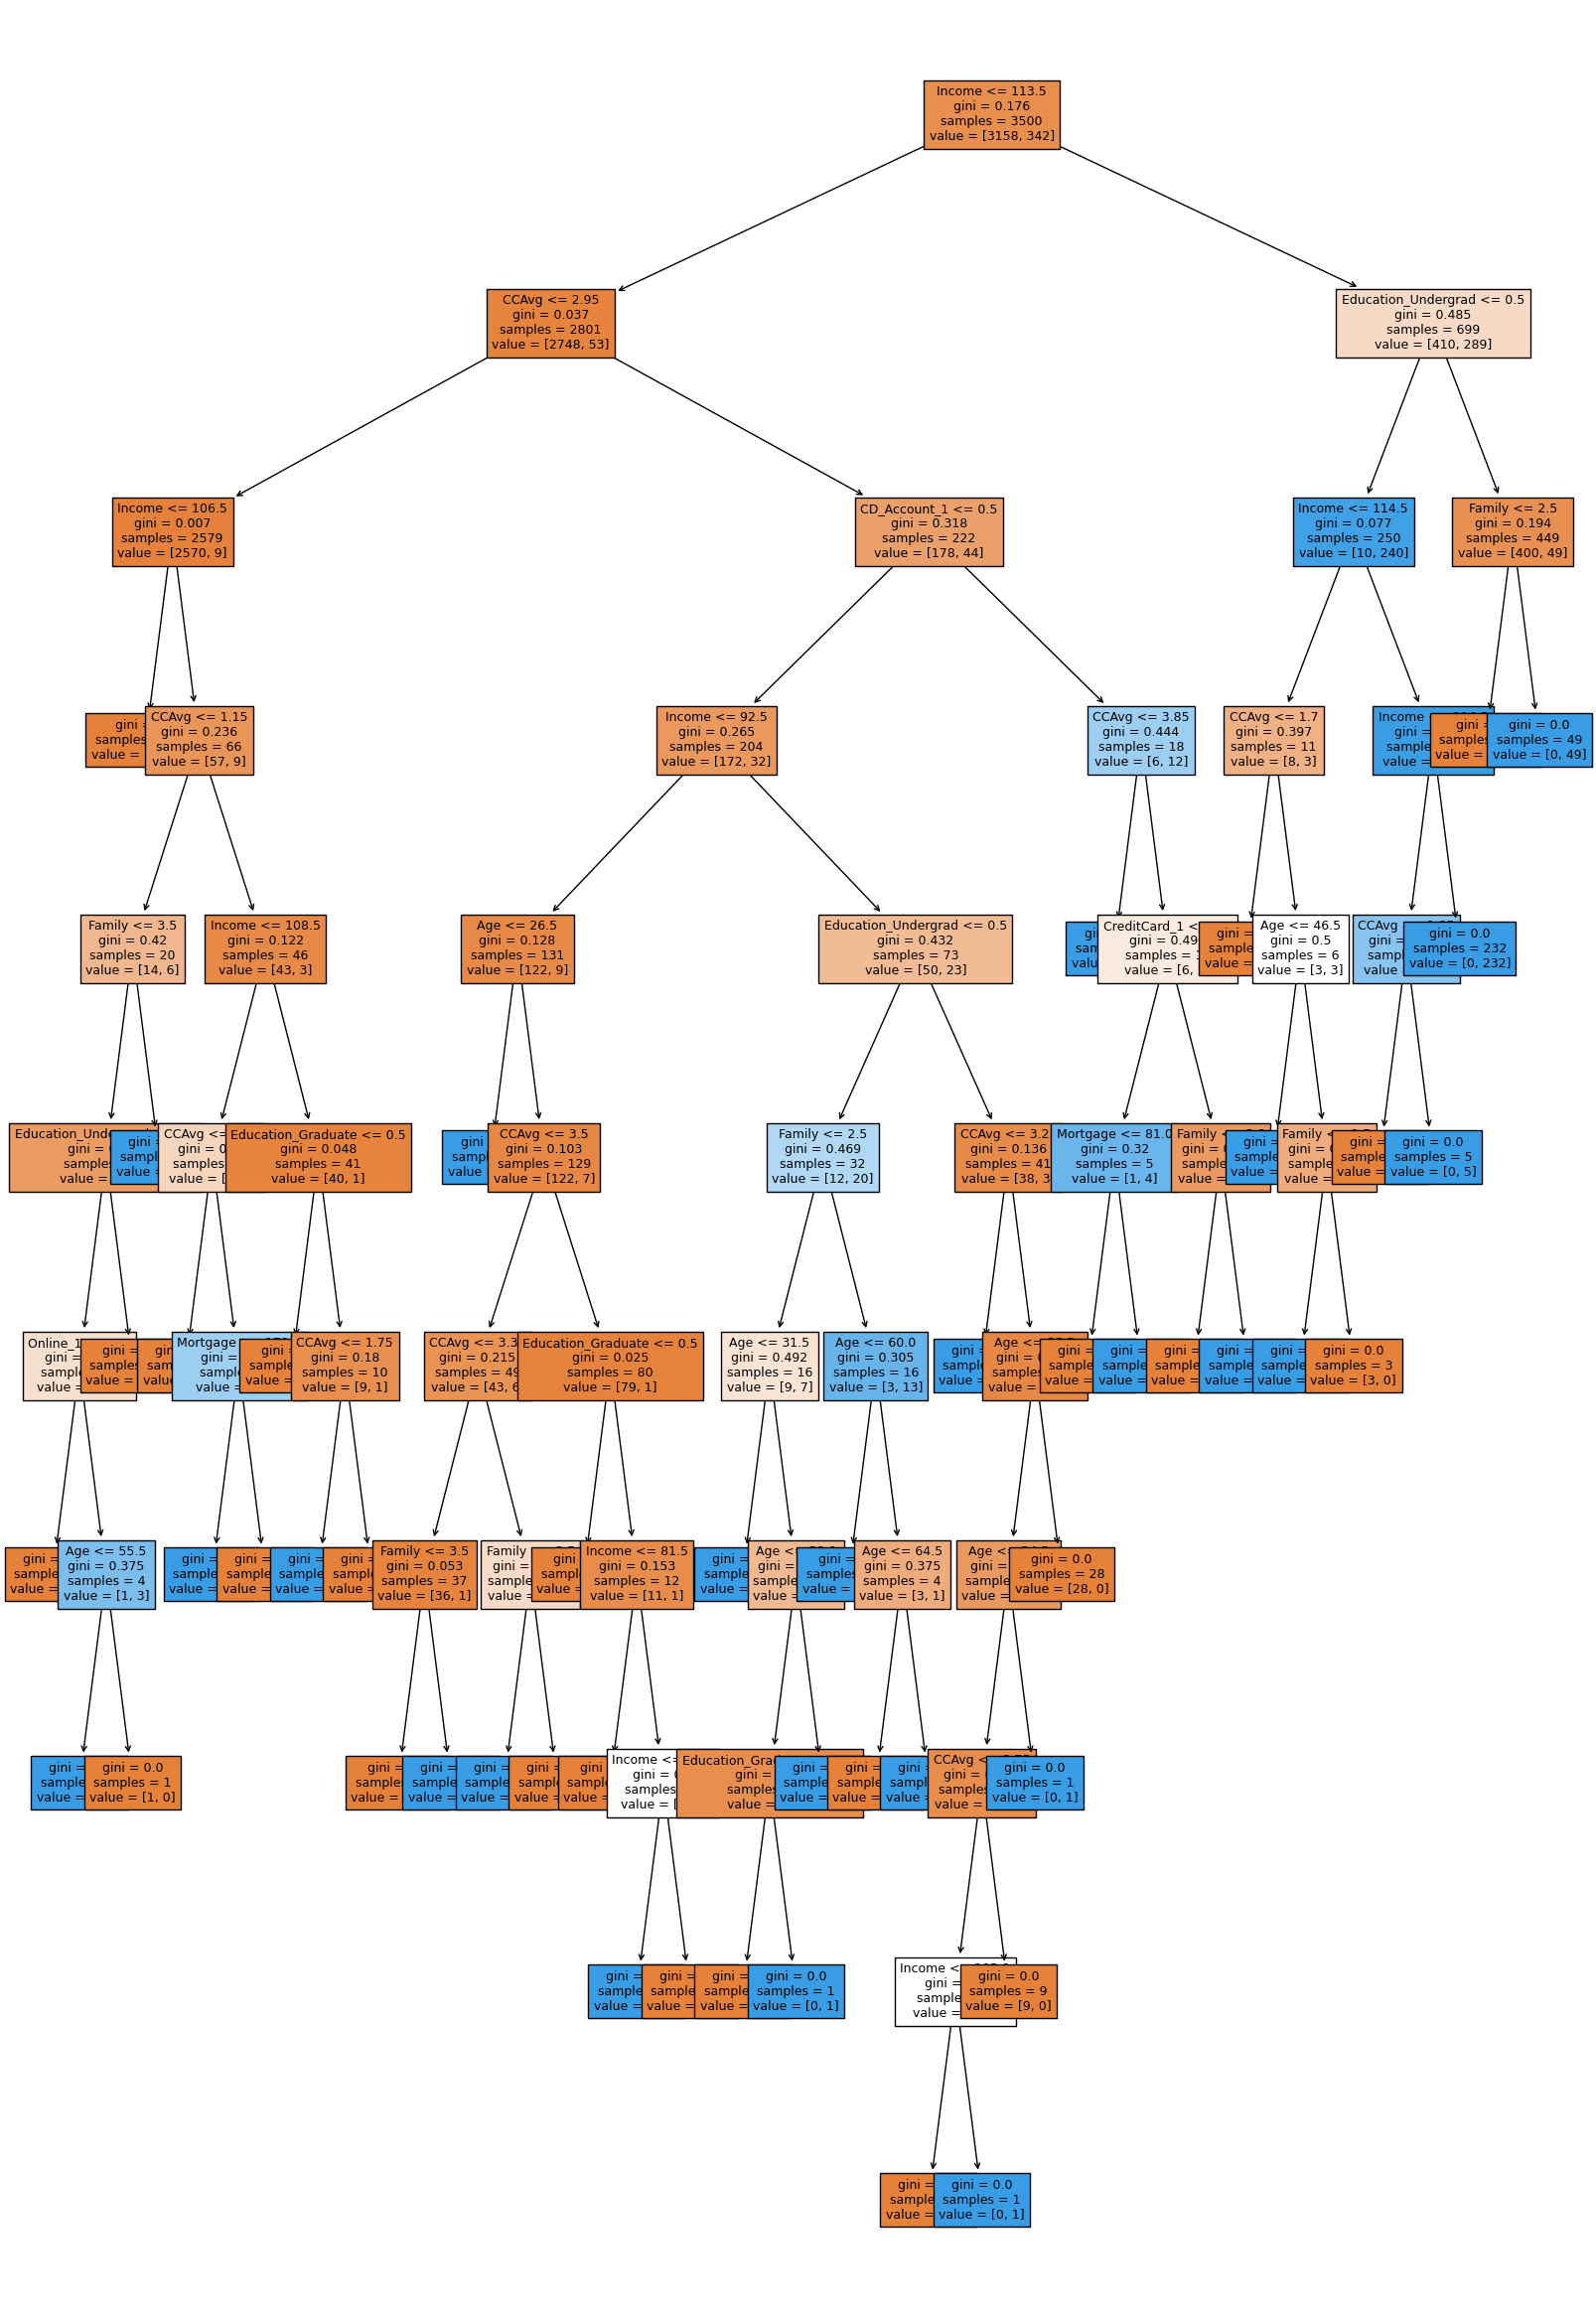

In [35]:
#We will also quickly visualise the decision tree (of the baseline model) as well as list down the features by their importants before we begin the perforance tuning
#1. Visualising the tree:
features_list = list(X_train.columns)

plt.figure(figsize=(20, 30))
leaves = tree.plot_tree(
    model_baseline,
    feature_names=features_list,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for l in leaves:
    arrow = l.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [36]:
# Text report showing the decision tree (of the baseline model)-
print(tree.export_text(model_baseline, feature_names=features_list, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2513.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 1.15
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |--- Online_1 <= 0.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |--- Online_1 >  0.50
|   |   |   |   |   |   |   |--- Age <= 55.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |--- Age >  55.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- CCAvg >  1.15
|   |   |   |   |--- Income <= 108.50
|   |   |   |   |   |--- CCAvg <= 1.85
|   |   |   |   |   |   |-

                       Imp
Education_Undergrad  0.397
Income               0.321
Family               0.168
CCAvg                0.053
Age                  0.032
CD_Account_1         0.014
Mortgage             0.005
CreditCard_1         0.004
Education_Graduate   0.003
Online_1             0.003
Securities_Account_1 0.000


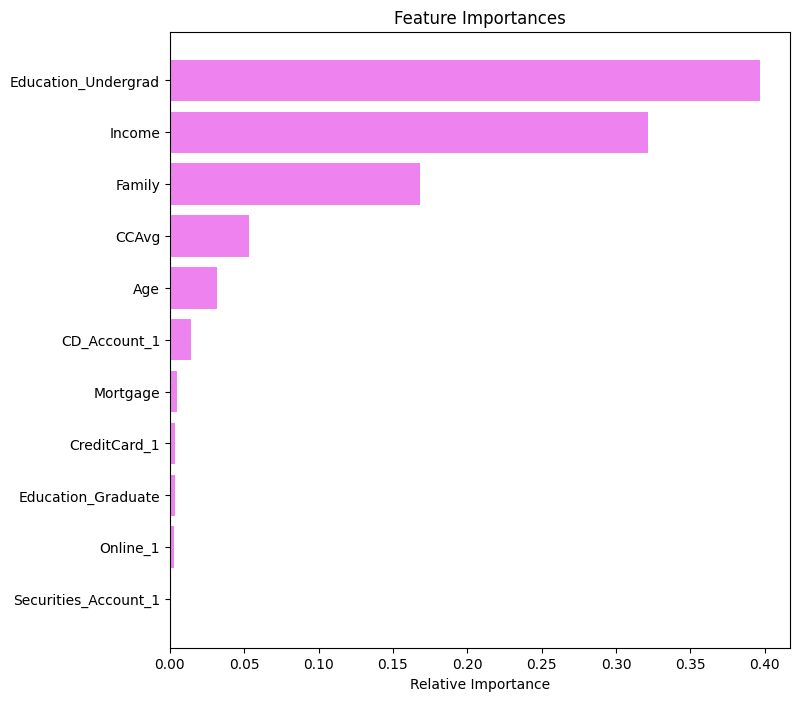

In [37]:
# importance of features in the tree
# Note that this feature importance list is for the baseline model that is overfit with the training set. However this gives us a baseline view.
print(pd.DataFrame(model_baseline.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

importances = model_baseline.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features_list[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- We note that in the baseline model, Education_undergrad, Income, Family and CCAvg form the features of the highest importance. however given it is a baseline model with overfitting on the training set, we will evaluate the feature importance again once we conduct pre-pruning and post-pruning exercise.


### Model Performance Improvement

####***Pre-pruning:***

In [38]:
# WE will use the GridSearchCV to find the optimum hyperparameters. Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

#1. instanciate a new classifier model
model_GridSearchCV_prepruned = DecisionTreeClassifier(random_state=1)

#2. Grid of parameters to choose from:
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [2, 5, 7, 10, 15, 20],
              'max_leaf_nodes' : [2, 3, 5, 8, 10, 12],
              'min_impurity_decrease': [0.001, 0.01, 0.1],
             }

improvement_scorer = metrics.make_scorer(metrics.recall_score) # set recall metric as the scorer ; also mention the lowee the recall value is, the better

#2. Run the grid search
grid_obj = GridSearchCV(model_GridSearchCV_prepruned, parameters, scoring=improvement_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the revised model to the best combination of parameters
model_GridSearchCV_prepruned = grid_obj.best_estimator_

# Fit the revised model to the training data.
model_GridSearchCV_prepruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       random_state=1)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education_Graduate', 'Education_Undergrad', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


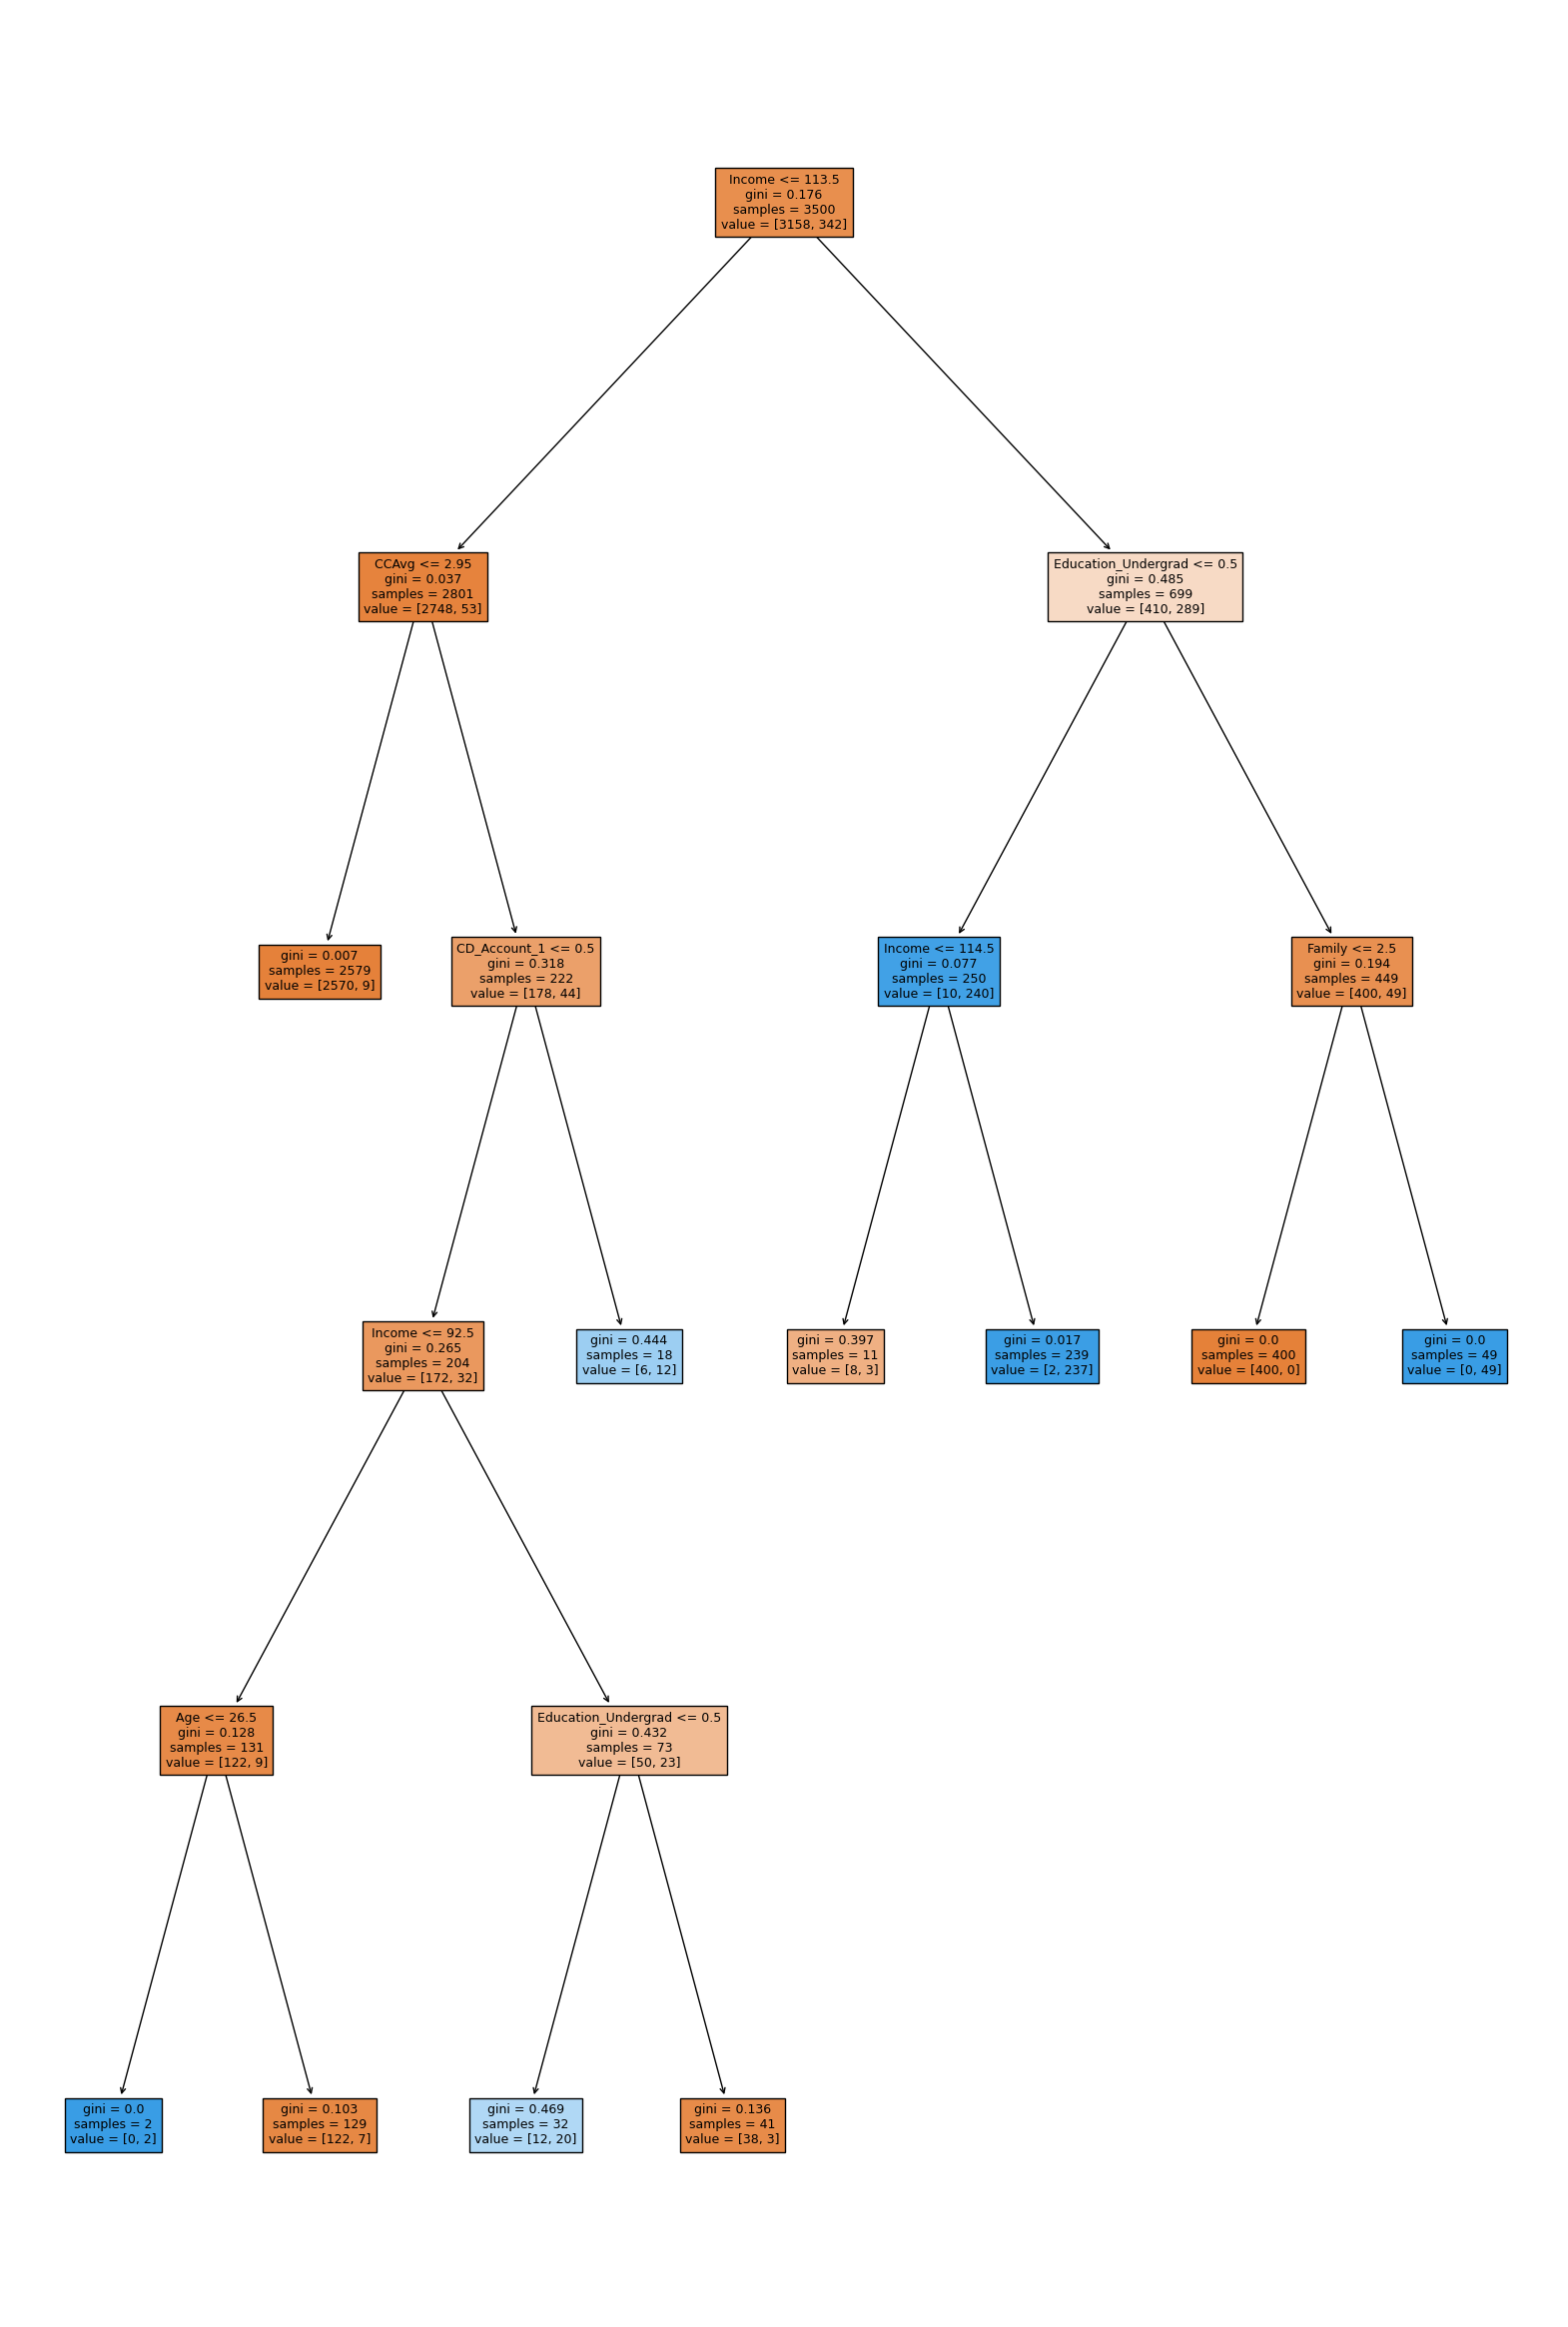

In [39]:
#1. Visualising the prepruned tree:
features_list = list(X_train.columns)
print(features_list)
plt.figure(figsize=(20, 30))
leaves = tree.plot_tree(
    model_GridSearchCV_prepruned,
    feature_names=features_list,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for l in leaves:
    arrow = l.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [40]:
# print all the performance matrices and the confusion matrix for the prepruned model
#1. Get performance metrics and confusion matrix for the prepruned model on its TRAINING set
p_scores,cm_scores = Get_model_Performace_metrics_and_confusion_matrix(model_clf= model_GridSearchCV_prepruned,X_df=X_train,y_df=y_train)

#2. Save all the performance metrics in a dataframe and save all the confusion matrix in another dataframe
df_All_performance_metrics = df_All_performance_metrics.append({"Model":"Prepruned Model","Data-set": "Train",
                                                                "Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},ignore_index=True)

print('Confusion matrix(TP, FP, FN, TN) values for Prepruned model,Train set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])
cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = df_All_Confusion_matrices.append({"Model":"Prepruned Model","Data-set": "Train",
                                          "TrueP": round(cm_scores[3]/cm_scores_sum,7),
                                          "FalseP":cm_scores[1]/cm_scores_sum,
                                          "FalseN":cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},ignore_index=True)

#3. Now get model metrices for the baseline model on its TEST dataset
p_scores,cm_scores= Get_model_Performace_metrics_and_confusion_matrix(model_clf=model_GridSearchCV_prepruned, X_df=X_test, y_df=y_test)

#4a. Save the TEST metrices in the same dataframe
df_All_performance_metrics = df_All_performance_metrics.append({"Model":"Prepruned Model",
                                                                "Data-set": "Test",
                                                                "Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},ignore_index=True)

#4b. Save the TEST confusion matrix in same confusion matrix dataframe
print('Confusion matrix(TP, FP, FN, TN) values for Prepruned model,Test set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])

cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = df_All_Confusion_matrices.append({"Model":"Prepruned Model","Data-set": "Test",
                                          "TrueP": cm_scores[3]/cm_scores_sum,
                                          "FalseP":cm_scores[1]/cm_scores_sum,
                                          "FalseN":cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},ignore_index=True)

# Get the gini impurty of the prepruned model
Gi_of_model = Get_gini_impurity_of_model(model_clf= model_GridSearchCV_prepruned)

#Save the gini_impurity in a dataframe and print it
df_All_gini_impurity = df_All_gini_impurity.append({'Model': 'Prepruned Model','gini_impurity':Gi_of_model},ignore_index = True)

#5 Print all the values for comparison
print("\033[4mPerformance Matrices:\033[0m\n", df_All_performance_metrics)
print('\n \033[4mConfusion Matrix\033[0m\n',df_All_Confusion_matrices)
print('\n \033[4mGini_Impurity\033[0m\n',df_All_gini_impurity)


Confusion matrix(TP, FP, FN, TN) values for Prepruned model,Train set- 320 20 22 3138
Confusion matrix(TP, FP, FN, TN) values for Prepruned model,Test set- 122 5 16 1357
Performance Matrices:
              Model Data-set  Accuracy  Recall  Precision    F1
0   Baseline Model    Train     1.000   1.000      1.000 1.000
1   Baseline Model     Test     0.979   0.862      0.908 0.885
2  Prepruned Model    Train     0.988   0.936      0.941 0.938
3  Prepruned Model     Test     0.986   0.884      0.961 0.921

 Confusion Matrix
              Model Data-set  TrueP  FalseP  FalseN  TrueN
0   Baseline Model    Train  0.098   0.000   0.000  0.902
1   Baseline Model     Test  0.079   0.008   0.013  0.900
2  Prepruned Model    Train  0.091   0.006   0.006  0.897
3  Prepruned Model     Test  0.081   0.003   0.011  0.905

 Gini_Impurity
              Model  gini_impurity
0         Baseline          0.436
1  Prepruned Model          0.402


Observations:
- We see that Recall and the false-negative value (for TEST SET) for the prepruned model stays the same at 87.9% and 1.2% repectievly, compared to the baseline model. However the gini impurity has gone down from 0.428 to 0.383 from the baseline to prepruned model.

- We will now conduct a post pruning exercise to arrive at a new decision tree model and check for any improvements in the performance metrics and other related metrics.

####***Post-pruning:***

In [41]:
#First begin by getting a new classfier/model
clf = DecisionTreeClassifier(random_state=1)
#Lets get the alpha and impurity values on the train set
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Tabulate the alpha and impurities on the train set
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,0.000
1,0.000,0.001
2,0.000,0.001
3,0.000,0.002
4,0.000,0.002
5,0.000,0.003
6,0.000,0.003
7,0.000,0.004
8,0.000,0.005
9,0.000,0.005


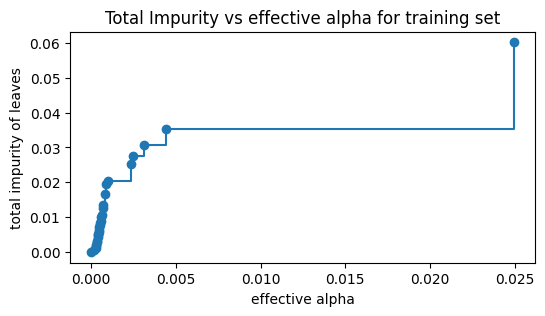

In [42]:
# plot alpha vs impurity gradient
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [43]:
# Get tree classification models for all the alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05809485976037476


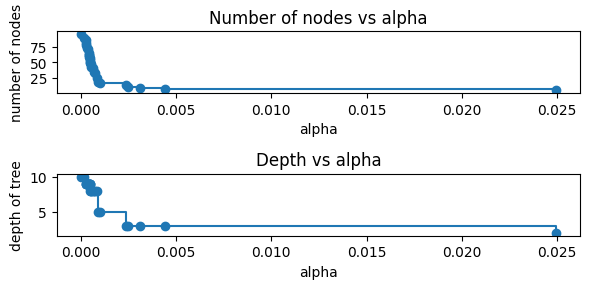

In [44]:
#plot all the trees in term of their nodes and their depths vs their respective alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(6,3))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [45]:
# Get the ACCURACY Scores for both train and test datasets for all clfs
train_acc_scores = [clf.score(X_train, y_train) for clf in clfs]
test_acc_scores = [clf.score(X_test, y_test) for clf in clfs]

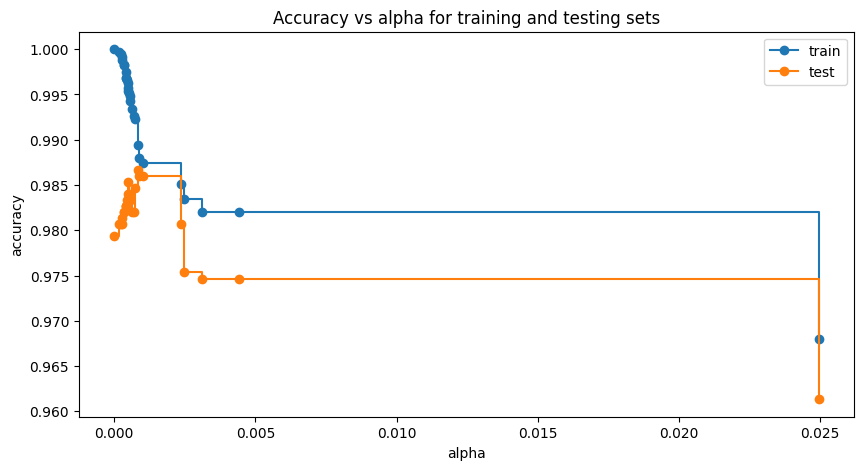

In [46]:
#Plot the accuracy scores of all the classifiers vs their alphas
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_acc_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We observe that as we traverse through each of the classifiers in the increasing order of their alphas, the accuracy of the classifiers in their train set begins to reduce. This is because the classifiers are in the decreasing order of the number of nodes ( and there fore decreasing order of their complexity). This also means the overfitting of the classifiers on the train set is decreasing (and their generalization increasing) as we traverse through them.

However for the test-set, as alpha increases (ie complexity reduces due to reduction in no. of nodes), the accuracy begins the improve (because the classifiers in the test-set are in the increasing order of 'fit' with the dataset). However the accuracy begins to go down after a certain alpha because the reduction in number of nodes starts to impact the classifiers negatively after a certain threshold.

To this extent, we will pick the classifier that has the best accuracy in the test set, in our next step.

In [47]:
# We pick the one classifier that has the best accuracy for the test set.
index_best_model = np.argmax(test_acc_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0008357142857142858, random_state=1)
Training accuracy of best model:  0.9894285714285714
Test accuracy of best model:  0.9866666666666667


In [48]:
# Get the RECALL Scores for both train and test datasets for all clfs
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

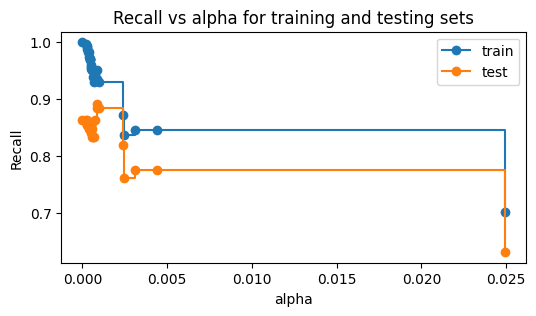

In [49]:
#Plot the RECALL scores of all the classifiers vs their alphas
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We observe that the RECALL score forms the same pattern as ACCURACY for train and test sets as descriebed above ie the recall value of the train-set keeps going down as we traverse the classifiers that have higher and higher alphas (ie lower and lower nodes/complexity) while for the test-set, the recall value goes up before it begins to drop.

In [50]:
# Find the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0008357142857142858, random_state=1)


In [51]:
# Now that we have the best model picked from the list of classifiers based on the best ACCURACY and best RECALL Score, lets get all the relevent metrics collectively and load them up in our collation dataframes
p_scores,cm_scores = Get_model_Performace_metrics_and_confusion_matrix(model_clf= best_model,X_df=X_train,y_df=y_train)

#2. Save all the performance metrics in a dataframe and save all the confusion matrix in another dataframe
df_All_performance_metrics = df_All_performance_metrics.append({"Model":"Best Model","Data-set": "Train",
                                                                "Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},ignore_index=True)

print('Confusion matrix(TP, FP, FN, TN) values for Postpruned model,Train set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])

cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = df_All_Confusion_matrices.append({"Model":"Best Model","Data-set": "Train",
                                          "TrueP": round(cm_scores[3]/cm_scores_sum,7),
                                          "FalseP":cm_scores[1]/cm_scores_sum,
                                          "FalseN":cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},ignore_index=True)

#3. Now get model metrices for the baseline model on its TEST dataset
p_scores,cm_scores= Get_model_Performace_metrics_and_confusion_matrix(model_clf=best_model, X_df=X_test, y_df=y_test)

#4a. Save the TEST metrices in the same dataframe
df_All_performance_metrics = df_All_performance_metrics.append({"Model":"Best Model","Data-set": "Test",
                                                                "Accuracy": p_scores[0],"Recall": p_scores[1],"Precision": p_scores[2],"F1": p_scores[3]},ignore_index=True)

#4b. Save the TEST confusion matrix in same confusion matrix dataframe
print('Confusion matrix(TP, FP, FN, TN) values for Postpruned model,Test set-',cm_scores[3],cm_scores[1],cm_scores[2],cm_scores[0])

cm_scores_sum = sum(cm_scores)
df_All_Confusion_matrices = df_All_Confusion_matrices.append({"Model":"Best Model","Data-set": "Test",
                                          "TrueP": cm_scores[3]/cm_scores_sum,
                                          "FalseP":cm_scores[1]/cm_scores_sum,
                                          "FalseN":cm_scores[2]/cm_scores_sum,
                                          "TrueN": cm_scores[0]/cm_scores_sum},ignore_index=True)

# Get the gini impurty of the postpruned model
Gi_of_model = Get_gini_impurity_of_model(model_clf= best_model)

#Save the gini_impurity in a dataframe and print it
df_All_gini_impurity = df_All_gini_impurity.append({'Model': 'Postpruned Model','gini_impurity':Gi_of_model},ignore_index = True)
#5 Print all the metrics values of all the 3 (baseline, prepruned and postpruned) models for comparison
print("\033[4mPerformance Matrices:\033[0m\n", df_All_performance_metrics)
print('\n \033[4mConfusion Matrix\033[0m\n',df_All_Confusion_matrices)
print('\n \033[4mGini_Impurity\033[0m\n',df_All_gini_impurity)


Confusion matrix(TP, FP, FN, TN) values for Postpruned model,Train set- 325 20 17 3138
Confusion matrix(TP, FP, FN, TN) values for Postpruned model,Test set- 123 5 15 1357
Performance Matrices:
              Model Data-set  Accuracy  Recall  Precision    F1
0   Baseline Model    Train     1.000   1.000      1.000 1.000
1   Baseline Model     Test     0.979   0.862      0.908 0.885
2  Prepruned Model    Train     0.988   0.936      0.941 0.938
3  Prepruned Model     Test     0.986   0.884      0.961 0.921
4       Best Model    Train     0.989   0.950      0.942 0.946
5       Best Model     Test     0.987   0.891      0.961 0.925

 Confusion Matrix
              Model Data-set  TrueP  FalseP  FalseN  TrueN
0   Baseline Model    Train  0.098   0.000   0.000  0.902
1   Baseline Model     Test  0.079   0.008   0.013  0.900
2  Prepruned Model    Train  0.091   0.006   0.006  0.897
3  Prepruned Model     Test  0.081   0.003   0.011  0.905
4       Best Model    Train  0.093   0.006   0.005  0.

## Model Comparison and Final Model Selection

We will tabulate all the values of the test datasets for all the models we have built and compare the score. (We will filter away the trainsets in the final summary)

Based on the comparitive review of the model results across the test set we will summarise the insights and recommendations


 FINAL SUMMARY

Performance Matrices:
              Model Data-set  Accuracy  Recall  Precision    F1
1   Baseline Model     Test     0.979   0.862      0.908 0.885
3  Prepruned Model     Test     0.986   0.884      0.961 0.921
5       Best Model     Test     0.987   0.891      0.961 0.925

 Confusion Matrix
              Model Data-set  TrueP  FalseP  FalseN  TrueN
1   Baseline Model     Test  0.079   0.008   0.013  0.900
3  Prepruned Model     Test  0.081   0.003   0.011  0.905
5       Best Model     Test  0.082   0.003   0.010  0.905

 Gini_Impurity
               Model  gini_impurity
0          Baseline          0.436
1   Prepruned Model          0.402
2  Postpruned Model          0.408

 Feature Importance



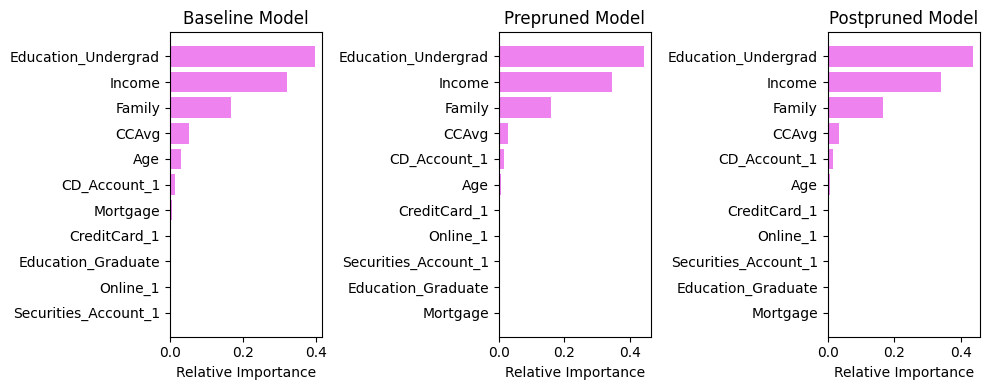

In [52]:
# PRINT THE FINAL SUMMARY
#5 Print all the TEST DATA SET values of all the 3  ( baseline, prepruned and postpruned) models for comparison
print('\n \033[1m\033[4mFINAL SUMMARY\033[1m\033[0m\n')
print("\033[4mPerformance Matrices:\033[0m\n", df_All_performance_metrics[df_All_performance_metrics['Data-set']=='Test'])
print('\n \033[4mConfusion Matrix\033[0m\n',df_All_Confusion_matrices[df_All_Confusion_matrices['Data-set']=='Test'])
print('\n \033[4mGini_Impurity\033[0m\n',df_All_gini_impurity)
print('\n \033[4mFeature Importance\033[0m\n')

#6 Also print the feature importances of all the 3 models
features_list = list(X_train.columns)

# Create a grid of subplots
#plt.figure(figsize=(20, 20))

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

# Plot a horizontal bar plot in each subplot
#1.baseline model
importances = model_baseline.feature_importances_
indices = np.argsort(importances)
axes[0].set_title("Baseline Model")
axes[0].barh(range(len(indices)), importances[indices], color="violet", align="center")
axes[0].set_yticks(range(len(indices)), [features_list[i] for i in indices])
axes[0].set_xlabel("Relative Importance")

# 2.Prepruned model
importances = model_GridSearchCV_prepruned.feature_importances_
indices = np.argsort(importances)
axes[1].set_title("Prepruned Model")
axes[1].barh(range(len(indices)), importances[indices], color="violet", align="center")
axes[1].set_yticks(range(len(indices)), [features_list[i] for i in indices])
axes[1].set_xlabel("Relative Importance")

# 3.Postpruned model
importances = best_model.feature_importances_
indices = np.argsort(importances)
axes[2].set_title("Postpruned Model")
axes[2].barh(range(len(indices)), importances[indices], color="violet", align="center")
axes[2].set_yticks(range(len(indices)), [features_list[i] for i in indices])
axes[2].set_xlabel("Relative Importance")

# Display the plot
plt.tight_layout()

plt.show()

## Actionable Insights and Business Recommendations


What recommedations would you suggest to the bank?

Following are the recommendations for the bank. These recommendations are provided on the basis of the metrics summarised in the 'final summary' presented above.   Also, the recommendations have been categorised per the *objectives* set out by the bank at the begining of the project to provide clarity on what is needed to achieve each objective:   

**Objective 1:** *To predict whether a liability customer will buy personal loans:*

**Recommendations:**

 - As called out in the begining of the project, our intent was to deploy a prediction model that had the highest Recall or the lowest FalseNegative score. Based on the score listed above, the postpruned model seems to be the best fit model to deploy for predicting the likelhood of a customer buying personal loan.
 - However, we need to also note that deploying post pruned model comes at a cost of needing higher infrastructure investment ie (high end memory, high end compute).
 - To this extent if the bank has limitations on investing in high end infrastructure to support maintainability of a post pruned model, a prepruned model can be deployed. Else they can continue with the post pruned model. While both models have high Recall, they also have very high accuracy (numbers as shown above).

**Objective 2:** *To understand which customer attributes are most significant in driving purchases:*

**Recommendations:**

 - Based on the feature importance ranking across all the three models as shown in the above graphs, it is clear that the top 4 most significant customer attributes in driving purchases are "Undergrad Education", "Income","Family" and "CCAvg".
 - From our EDA we know that features including 'Income','Family' and 'CCAvg' are positively correlated with personal loan. ie higher income, bigger families higher CCAvg spend increase likelyhood of (loan) purchases. However 'Undergrad Education' is inversly correlated to personal loan, ie. customers with undergrad degree are morelikely to NOT take personal loan.

**Objective 3:** *To identify which segment of customers to target more:*

**Recommendations:**

 - Based on our exploratory data analysis of the initial assessment of the campaign that the bank ran last year for liability customers (that showed a healthy conversion rate of over 9% success), we know that:
  -  Customers who had higher incomes with their median at 150k had taken personal loan as opposed to median income of customers without personal loan being at about 60k. Given Income is a key feature of importance, the retail marketing department should devise targetted marketing to this customer segment to increase conversion success ratio.
  - Similarly customer who have families of larger sizes (ie >2 members) were more likely to take personal loans as opposed to families of size 2, per our EDA. Given "family" is also a key feature of importance, the marketing team should create targetted marketing campaign for larger families (of more than two members)  
  - Customers with higher CCAvg spend ((median of ~3.5k per month) also showed more likelyhood of taking personal loan as opposed to those with lower CCAvg (median of ~1.5k per month). To this extent, the marketing team should target customers with >3.5k median Credit card spend to increase conversion success ratio.
  - Finally, the marketing team can target customer who have the CD_Account opened with the bank given both from feature importance and our EDA analysis we know that it is also a key feature that is positively correlated with loan purchase. Moreover, we also know from EDA that only 46% of customer who have a CD_Account have taken loan. This means that a good 54% of CD_Acc customr are available for the marketing team to tap and target.

**Other general recommendations:**  
- a) It is interesting to note that 97%+ of this bank's customer base have credit card spend with this bank. Moreover almost 70% customer do not have any other credit card from other banks. This means it is quite clear that its customers are quite loyal to the bank.
  
- b) Now looking at the demographics of the customers we also see that:
    - ~35% of the age demographics is less than 40 yrs age.
    - Most of the customers do not have securities account (90%) nor CD account(94%)
    - Also 58% of cutomers are either grads or advanced/professionals.
    
Considering both points a) and be) above, the bank has a golden opportunity to 'educate' its 'loyal' customer base of all the other available services of the bank and upsell all its services including CD_Acc, Securities account and mortgage. This will put the bank in a great place stratigically in the long term as its customers grow in thier income levels and family sizes that will eventually lead them to taking personal loan from the bank.

Therefore in addition to making targetted marketing to selling personal loan to the segments mentioned earlier, they should also make efforts in 'educating' its loyal customer base, mainly graduate & advanced/professional customers, of its other finacial services it has to offer.



___